In [51]:
from cv2 import threshold
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

df = pd.read_csv("/home/kathy/NPHdata.csv")
df.dropna(inplace=True, subset=['File Name'])
df

thresholds = list(np.array(list(range(int(4937.055727), int(168133.2351), int(16319.0)))))

In [52]:
from re import A
import numpy as np

res = {}

list_tp, list_fn, list_fp, list_tn = [], [], [], []

for threshold in thresholds:
    list_tp.append(0)
    list_fn.append(0)
    list_fp.append(0)
    list_tn.append(0)
    for index, instance in df.iterrows():
        actual = instance["Has NPH?"]
        prediction = instance["Manual Threshold - Ventricular Volume"]
        pred = True if instance['Ventricular Volume (mm^3)'] > threshold else False
        res.setdefault(threshold, []).append(pred)

        if actual == "TRUE" and pred == True:
            list_tp[-1] += 1
        elif actual == "FALSE" and pred == False:
            list_tn[-1] += 1
        elif actual == "TRUE" and pred == False:
            list_fn[-1] += 1
        elif actual == "FALSE" and pred  == True:
            list_fp[-1] += 1

In [53]:
list_tpr = []
list_fpr = []
for i in range(len(list_fp)):
    list_tpr.append(list_tp[i]/(list_tp[i]+list_fn[i]))
    list_fpr.append(list_fp[i]/(list_tn[i]+list_fp[i]))

0.9480519480519483

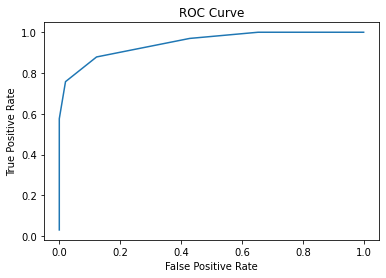

In [54]:
import matplotlib.pyplot as plt
from sklearn import metrics

plt.plot(list_fpr, list_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

metrics.auc(list_fpr, list_tpr)